In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#pip install sranodec

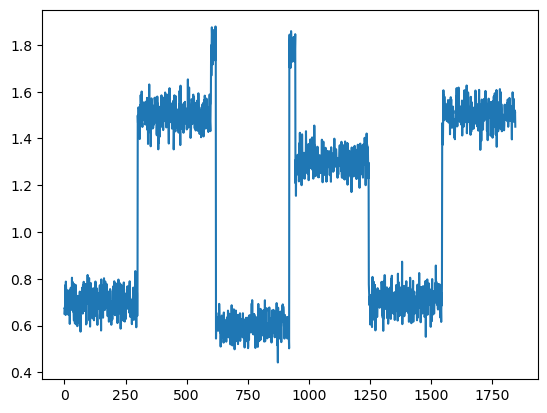

In [19]:
# Generate test data
test_signal = np.concatenate(
    [np.random.normal(0.7, 0.05, 300), 
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(1.8, 0.05, 20),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.8, 0.05, 25),
     np.random.normal(1.3, 0.05, 300),
np.random.normal(0.7, 0.05, 300)
    ,
     
      np.random.normal(1.5, 0.05, 300)
    
    ]

)
plt.plot(test_signal)

In [6]:
import sranodec as anom

In [20]:
# less than period
amp_window_size=len(test_signal) -1
# (maybe) as same as period
series_window_size=len(test_signal)-1
# a number enough larger than period
score_window_size=len(test_signal)-1

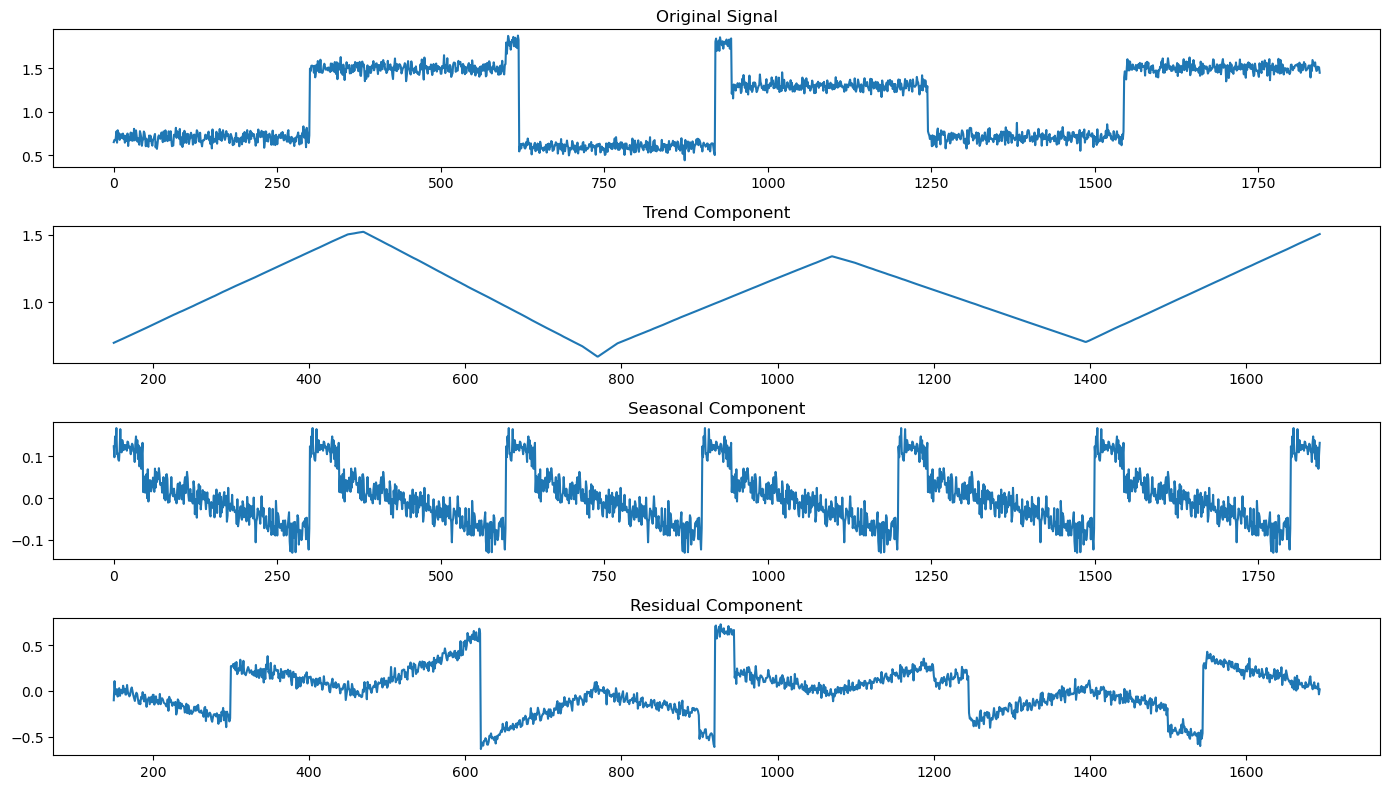

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Apply seasonal decomposition
# Since we do not have a specific frequency for seasonality in the synthetic data, 
# we assume an arbitrary seasonal frequency. This would typically be informed by domain knowledge.
# Here, let's assume a seasonal frequency of 300, corresponding to the segments in test_signal.
result = seasonal_decompose(test_signal, model='additive', period=300)

# Plot the seasonal decomposition
plt.figure(figsize=(14, 8))

# Original Signal
plt.subplot(411)
plt.plot(result.observed)
plt.title('Original Signal')

# Trend Component
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend Component')

# Seasonal Component
plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

# Residual Component
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual Component')

# Adjust layout
plt.tight_layout()
plt.show()


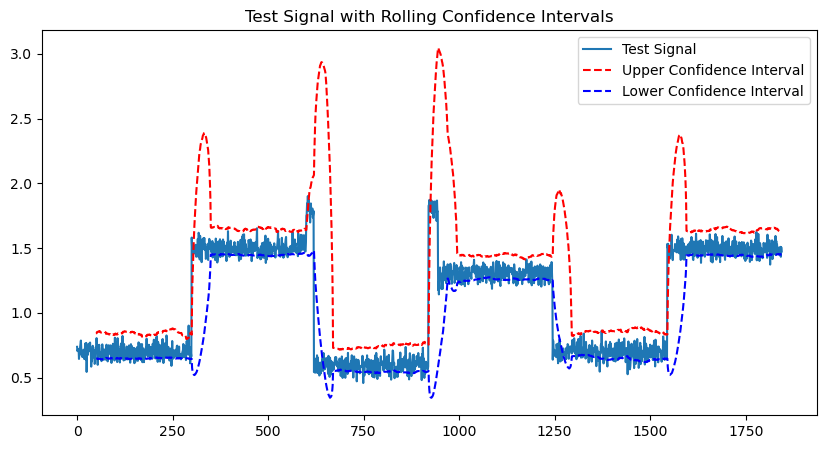

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize arrays to hold the upper and lower confidence values
upper_confidence = np.zeros(len(test_signal))
lower_confidence = np.zeros(len(test_signal))

window_size = 50

# Calculate rolling mean and standard deviation
for i in range(window_size, len(test_signal)):
    window_data = test_signal[i-window_size:i]
    mean = np.mean(window_data)
    std = np.std(window_data)
    upper_confidence[i] = mean + 3*std
    lower_confidence[i] = mean - 1*std

# For visualization, set the first window_size values to NaN since they don't have enough data for the window
upper_confidence[:window_size] = np.nan
lower_confidence[:window_size] = np.nan

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(test_signal, label='Test Signal')
plt.plot(upper_confidence, label='Upper Confidence Interval', color='r', linestyle='--')
plt.plot(lower_confidence, label='Lower Confidence Interval', color='b', linestyle='--')

plt.title('Test Signal with Rolling Confidence Intervals')
plt.legend()
plt.show()


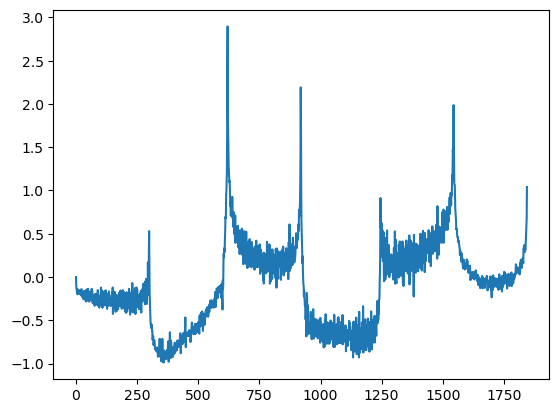

In [26]:
spec = anom.Silency(amp_window_size, series_window_size, score_window_size)

score = spec.generate_anomaly_score(test_signal)
plt.plot(score)

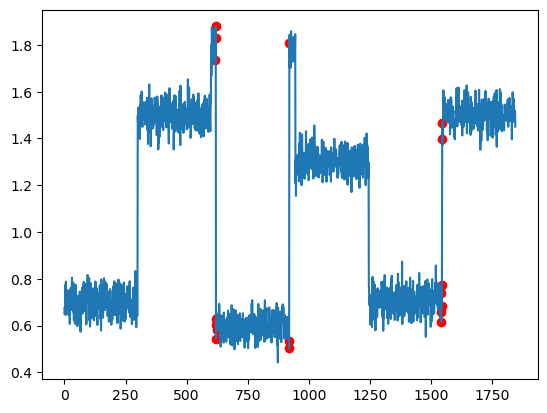

In [30]:
# Plot data with estimated anomalous points
plt.plot(test_signal, alpha=1, label="observation")
index_changes = np.where(score > np.percentile(score, 99))[0]
plt.scatter(index_changes, test_signal[index_changes], c='red', label="change point")